In [1]:
import os 
import numpy as np 
import torch 
import time
import timm

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim #for gradient descent

# alexnet
import torchvision.models

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

C:\Users\jiaxz\anaconda3\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\jiaxz\anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [2]:
data_dir = './Snake_Images/'
train_dir = os.path.join(data_dir,'train/')
test_dir = os.path.join(data_dir,'test/')


classes = ["Non_Venomous" , "Venomous"]
data_transform = transforms.Compose([transforms.Resize([224,224]), transforms.ToTensor()])
train_data = datasets.ImageFolder(train_dir, transform = data_transform)
test_data = datasets.ImageFolder(test_dir, transform = data_transform)

print('Num training images' , len(train_data))  # it opens up all the images in the folder
print('Num test images', len(test_data))

Num training images 1775
Num test images 192


In [23]:
batch_size = 36

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True)

<ipython-input-24-82b2ddc7ad6d>:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])


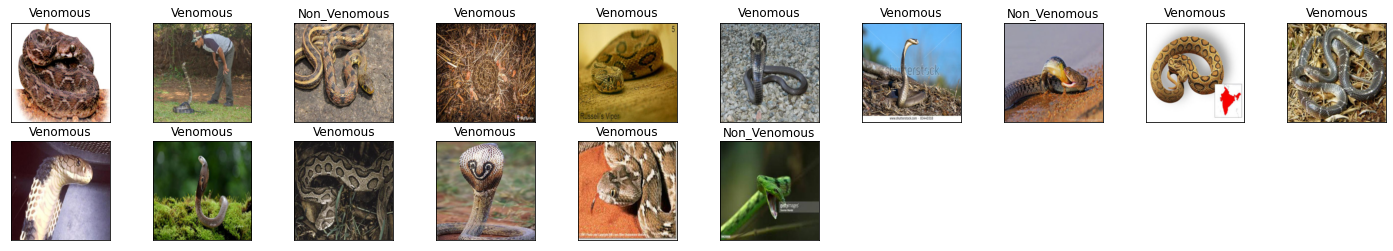

In [24]:
# Visualize some sample data

# obtain one batch of training images
dataiter = iter(train_loader)   # get the image from train_loader
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(16):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

In [651]:
model = timm.create_model('regnety_002', pretrained=True) # get the model from the DCNN


In [652]:
model.cuda()

RegNet(
  (stem): ConvBnAct(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (act): ReLU(inplace=True)
    )
  )
  (s1): RegStage(
    (b1): Bottleneck(
      (conv1): ConvBnAct(
        (conv): Conv2d(32, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNormAct2d(
          24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (act): ReLU(inplace=True)
        )
      )
      (conv2): ConvBnAct(
        (conv): Conv2d(24, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=3, bias=False)
        (bn): BatchNormAct2d(
          24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (act): ReLU(inplace=True)
        )
      )
      (se): SEModule(
        (fc1): Conv2d(24, 8, kernel_size=(1, 1), stride=(1, 1))
        (bn): Identity()
        (act): ReLU(inplace=True)


# testing on the model using single image

<ipython-input-657-59fb9efd7868>:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])


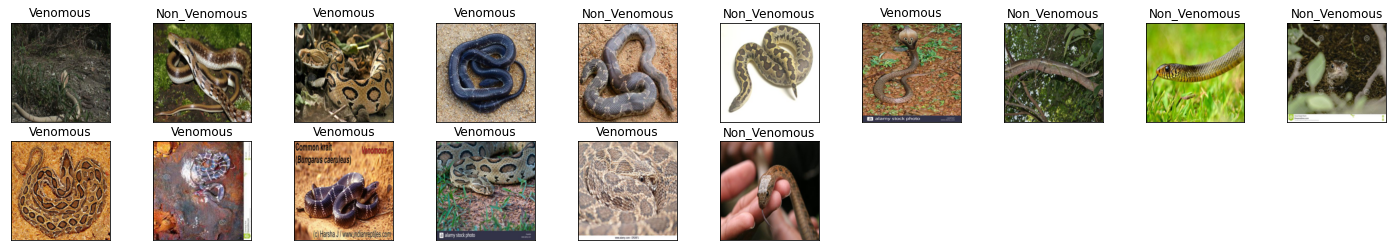

In [657]:
# Visualize some sample data
train_loader = torch.utils.data.DataLoader(train_data, batch_size = 20, shuffle = True)
# obtain one batch of training images
dataiter = iter(train_loader)   # get the image from train_loader
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(16):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

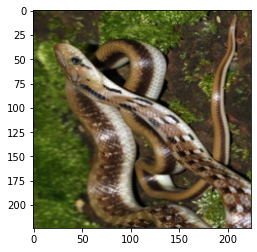

In [658]:
images[1],labels[1]
plt.imshow(images[1].T)

In [659]:
one_batch =  iter(train_loader)
imgs, label = one_batch.next()

In [660]:
imgs = imgs.cuda()
out = model(imgs)
out.shape

torch.Size([20, 1000])

In [661]:
nn.CrossEntropyLoss?

In [665]:
# fully connected layer
# fully connected layer
class ANNClassifier(nn.Module):
    def __init__(self):
        super(ANNClassifier, self).__init__()  # Fully connector layers with 3 hidden layers 
        self.name = 'ANNClassifier'
        self.fc1 = nn.Linear(1000, 256) # the ouput image size is 256*6*6, batch size was eliminated as shown before 
        self.fc2 = nn.Linear(256, 128) # Hidden units = 128
        self.fc3 = nn.Linear(128, 32) # Hidden units = 32
        self.fc4 = nn.Linear(32, 2)

    def forward(self, x):
        x = x.view(-1, 1000) #flatten feature data
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [666]:
snakeModel = ANNClassifier()

In [667]:
model_parameters = sum(p.numel() for p in snakeModel.parameters() if p.requires_grad)
model_parameters

293346

In [668]:
snakeModel = snakeModel.cuda()
outDCNN = model(imgs)
outAnn = snakeModel(outDCNN)
outAnn

tensor([[0.1848, 0.0307],
        [0.1838, 0.1926],
        [0.1166, 0.2062],
        [0.1265, 0.1524],
        [0.1398, 0.0207],
        [0.1188, 0.1122],
        [0.1333, 0.2228],
        [0.1412, 0.1321],
        [0.1479, 0.2038],
        [0.1665, 0.1443],
        [0.1648, 0.1233],
        [0.0810, 0.1102],
        [0.1158, 0.1053],
        [0.0983, 0.1986],
        [0.0809, 0.1269],
        [0.1916, 0.1193],
        [0.1359, 0.1287],
        [0.1566, 0.1863],
        [0.0848, 0.1813],
        [0.1504, 0.1338]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [669]:
def get_accuracy(DCNNmodel,AnnModel,small_loader):
    
    data_loader = small_loader


    correct = 0
    total = 0
    for imgs, labels in data_loader:
        
         
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
        
        
        output = DCNNmodel(imgs)
        output = AnnModel(output)
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1] # predication to find how many is correct
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [670]:
def train(model,AnnModel,data, batch_size=20, num_epochs=1, LR = 0.001):
    small_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True) # batch size is the number of image that you want to process together 
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(AnnModel.parameters(), lr=LR, momentum=0.9)

    iters, losses, small_acc = [], [], [], [], []
    
    # training
    n = 0 # the number of iterations
    start_time=time.time()
    for epoch in range(num_epochs):
        mini_b=0
        mini_batch_correct = 0
        Mini_batch_total = 0
        for imgs, labels in iter(small_loader):
          
            
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
                imgs = imgs.cuda()
                labels = labels.cuda()
            #############################################
          
                        # forward pass
            DCNNout = model(imgs)        # the output value from the DCNN
            out = AnnModel(DCNNout)
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
        n += 1  


          # save the current training information
        iters.append(n)
        losses.append(float(loss)/batch_size)             # compute *average* loss
        
        small_acc.append(get_accuracy(model,AnnModel,small_loader))
          
            

        print ("Epoch %d Finished. " % epoch ,'accuracy',small_acc[epoch],"Time per Epoch: % 6.2f s "% ((time.time()-start_time) / (epoch +1)))


    end_time= time.time()
    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, small_acc, label="Training")
       
    plt.xlabel("Epoch")
    plt.ylabel("trainning Accuracy")
    plt.legend(loc='best')
    plt.show()

    
    print("Final Training Accuracy: {}".format(small_acc[-1]))
    #print("Final Validation Accuracy: {}".format(val_acc[-1]))
    print ("Total time:  % 6.2f s  Time per Epoch: % 6.2f s " % ( (end_time-start_time), ((end_time-start_time) / num_epochs) ))

Epoch 0 Finished.  accuracy 0.6332394366197183 Time per Epoch:  20.08 s 
Epoch 1 Finished.  accuracy 0.7019718309859155 Time per Epoch:  20.09 s 
Epoch 2 Finished.  accuracy 0.7228169014084507 Time per Epoch:  20.08 s 
Epoch 3 Finished.  accuracy 0.7504225352112676 Time per Epoch:  20.11 s 
Epoch 4 Finished.  accuracy 0.7774647887323943 Time per Epoch:  20.10 s 
Epoch 5 Finished.  accuracy 0.8270422535211268 Time per Epoch:  20.14 s 
Epoch 6 Finished.  accuracy 0.856338028169014 Time per Epoch:  20.13 s 
Epoch 7 Finished.  accuracy 0.8625352112676057 Time per Epoch:  20.13 s 
Epoch 8 Finished.  accuracy 0.8670422535211267 Time per Epoch:  20.15 s 
Epoch 9 Finished.  accuracy 0.8704225352112676 Time per Epoch:  20.16 s 
Epoch 10 Finished.  accuracy 0.8861971830985915 Time per Epoch:  20.15 s 
Epoch 11 Finished.  accuracy 0.9053521126760563 Time per Epoch:  20.16 s 
Epoch 12 Finished.  accuracy 0.9115492957746479 Time per Epoch:  20.18 s 
Epoch 13 Finished.  accuracy 0.9143661971830986 T

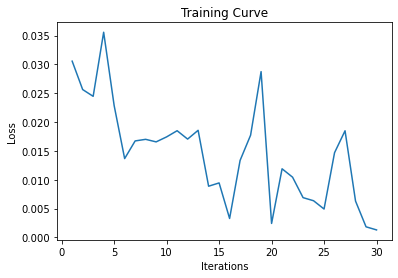

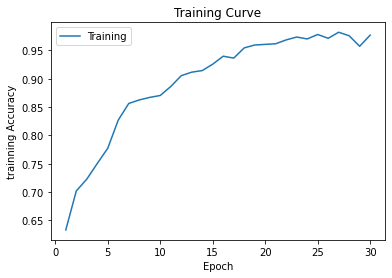

Final Training Accuracy: 0.9769014084507043
Total time:   611.50 s  Time per Epoch:  20.38 s 


In [58]:
use_cuda = True
DCNNmodel = model.cuda()
AnnModel = ANNClassifier().cuda()
train(DCNNmodel,AnnModel, train_data,batch_size = 20, num_epochs = 30, LR = 0.001)

In [671]:
dataiter = iter(test_loader)   # get the image from train_loader
images, labels = dataiter.next()

In [672]:
images,labels

(tensor([[[[0.5333, 0.5490, 0.6784,  ..., 0.5294, 0.5686, 0.5608],
           [0.5451, 0.5373, 0.5961,  ..., 0.5451, 0.5255, 0.5098],
           [0.5333, 0.5098, 0.5059,  ..., 0.5647, 0.5020, 0.4902],
           ...,
           [0.6784, 0.7529, 0.8039,  ..., 0.8039, 0.7922, 0.8039],
           [0.6549, 0.6784, 0.7333,  ..., 0.8078, 0.7843, 0.8039],
           [0.6392, 0.6196, 0.6706,  ..., 0.7922, 0.8000, 0.8039]],
 
          [[0.4392, 0.4549, 0.5843,  ..., 0.4118, 0.4471, 0.4314],
           [0.4549, 0.4431, 0.5020,  ..., 0.4314, 0.4039, 0.3843],
           [0.4471, 0.4196, 0.4157,  ..., 0.4471, 0.3804, 0.3647],
           ...,
           [0.5294, 0.6039, 0.6588,  ..., 0.6549, 0.6353, 0.6431],
           [0.5059, 0.5294, 0.5882,  ..., 0.6588, 0.6235, 0.6353],
           [0.4902, 0.4706, 0.5255,  ..., 0.6353, 0.6353, 0.6353]],
 
          [[0.2510, 0.2667, 0.4000,  ..., 0.2627, 0.2863, 0.2706],
           [0.2667, 0.2588, 0.3216,  ..., 0.2784, 0.2431, 0.2235],
           [0.2627, 0.23

In [674]:
pred = DCNNmodel(images.cuda())
pred = AnnModel(pred)

In [675]:
# comparison between the prediction and the actual result
pred = pred.max(1, keepdim=True)[1]
np.squeeze(pred,1),labels

(tensor([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
         1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0], device='cuda:0'),
 tensor([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
         1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]))

In [677]:
test_accuracy_test = get_accuracy(DCNNmodel,AnnModel,test_loader)
print("test accuracy_test:", test_accuracy_test)

test accuracy_test: 0.8229166666666666
